# Part I - Communicating Data Findings from Prosper Loan Data
## by Carol Ogira

## Introduction
The dataset for this study is from [prosper](https://www.prosper.com/about), which facilitates matching borrowers with investors and handles the loan servicing on behalf of them.

In this part, we will focus on explotary anlyses to get some insights from the loan data, such as patterns, relationships.
The 81 variables in this dataset give information about the bid, credit profile of the borrower, the loans and their performance, investors, among others. Below are the description of some of the variables:

'ProsperRating (Alpha)',
'ProsperScore','BorrowerState', 'Occupation', 'EmploymentStatus','DebtToIncomeRatio','IncomeRange','IncomeVerifiable',
'StatedMonthlyIncome','LoanOriginalAmount','LoanOriginationDate','LoanOriginationQuarter',
'MonthlyLoanPayment','PercentFunded','Recommendations','InvestmentFromFriendsCount','InvestmentFromFriendsAmount',
'Investors'
- ListingNumber:	The number that uniquely identifies the listing to the public as displayed on the website.
- ListingCreationDate:	The date the listing was created.
- CreditGrade:	The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
- Term:	The length of the loan expressed in months.
- LoanStatus:	The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
- BorrowerAPR:	The Borrower's Annual Percentage Rate (APR) for the loan.
- ProsperRating (Alpha):    The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
- ProsperScore:	A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
- BorrowerState:	The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
- Occupation:	The Occupation selected by the Borrower at the time they created the listing.
- EmploymentStatus:	The employment status of the borrower at the time they posted the listing.
- DebtToIncomeRatio:	The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
- IncomeRange:	The income range of the borrower at the time the listing was created.
- IncomeVerifiable:	The borrower indicated they have the required documentation to support their income.
- StatedMonthlyIncome:	The monthly income the borrower stated at the time the listing was created.
- TotalProsperLoans:	Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans. 
- TotalProsperPaymentsBilled:	Number of on time payments the borrower made on Prosper loans at the time they created this listing. This value will be null if the borrower had no prior loans.
- LoanOriginalAmount:	The origination amount of the loan.
- LoanOriginationDate:	The date the loan was originated.
- LoanOriginationQuarter:	The quarter in which the loan was originated.
- MemberKey:	The unique key that is associated with the borrower. This is the same identifier that is used in the API member object. 
- MonthlyLoanPayment:	The scheduled monthly loan payment.
- PercentFunded:	Percent the listing was funded.
- InvestmentFromFriendsCount:	Number of friends that made an investment in the loan.
- InvestmentFromFriendsAmount:	Dollar amount of investments that were made by friends.
- Investors:	The number of investors that funded the loan.

Description of all the variables can be found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0).

We'll perform univariate, bivariate and multivariate exploration, then draw conclusions from the findings.


## Preliminary Wrangling
In this step, we assess the data for any data quality or tidiness issues, then clean accordingly for the proceeding analyses.


In [1]:
# importing required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# setting plots to be embedded inline
%matplotlib inline      

In [2]:
# loading data
loan_df = pd.read_csv('prosperLoanData.csv')
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# structure of the dataset
loan_df.shape

(113937, 81)

In [4]:
# general information about the loan data
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

#### Assessing and Cleaning the Data

In this section, we'll:

a. select only variables that will be imperative to our analysis

b. ensure all features have the correct datatype

c. identify and drop duplicates

d. find and appropriately handle records with missing values 

In [16]:
# selected features
features = ['ListingNumber','ListingCreationDate','CreditGrade','Term','LoanStatus','ProsperRating (Alpha)',
'ProsperScore','BorrowerState', 'Occupation', 'EmploymentStatus','DebtToIncomeRatio','IncomeRange','IncomeVerifiable',
'StatedMonthlyIncome','LoanOriginalAmount','LoanOriginationDate',
'MonthlyLoanPayment','PercentFunded','Recommendations','InvestmentFromFriendsCount','InvestmentFromFriendsAmount',
'Investors'
]
df = loan_df[features]

# saving our dataset for visual assessment
df.to_csv('df1.csv')
df.head()

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ProsperRating (Alpha),ProsperScore,BorrowerState,Occupation,EmploymentStatus,...,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,2007-08-26 19:09:29.263000000,C,36,Completed,NaN,NaN,CO,Other,Self-employed,...,True,3083.333333,9425,2007-09-12 00:00:00,330.43,1.0,0,0,0.0,258
1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,A,7.0,CO,Professional,Employed,...,True,6125.000000,10000,2014-03-03 00:00:00,318.93,1.0,0,0,0.0,1
2,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,NaN,NaN,GA,Other,Not available,...,True,2083.333333,3001,2007-01-17 00:00:00,123.32,1.0,0,0,0.0,41
3,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,A,9.0,GA,Skilled Labor,Employed,...,True,2875.000000,10000,2012-11-01 00:00:00,321.45,1.0,0,0,0.0,158
4,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,D,4.0,MN,Executive,Employed,...,True,9583.333333,15000,2013-09-20 00:00:00,563.97,1.0,0,0,0.0,20


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ListingNumber                113937 non-null  int64  
 1   ListingCreationDate          113937 non-null  object 
 2   CreditGrade                  28953 non-null   object 
 3   Term                         113937 non-null  int64  
 4   LoanStatus                   113937 non-null  object 
 5   ProsperRating (numeric)      84853 non-null   float64
 6   ProsperScore                 84853 non-null   float64
 7   BorrowerState                108422 non-null  object 
 8   Occupation                   110349 non-null  object 
 9   EmploymentStatus             111682 non-null  object 
 10  DebtToIncomeRatio            105383 non-null  float64
 11  IncomeRange                  113937 non-null  object 
 12  IncomeVerifiable             113937 non-null  bool   
 13 

ListingCreationDate and LoanOriginationDate have incorrect datatypes, we'll change them to datetime

In [17]:
# df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])
df[['ListingCreationDate', 'LoanOriginationDate']] = df[['ListingCreationDate', 'LoanOriginationDate']].apply(pd.to_datetime)

/home/carol/.local/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


From the visual assessment of the data, we'll drop records before July 2009, since they introduce nulls in the prosperrating column then delete creditgrade column from the dataset. Furthermore, prosperscore, which gives a risk score of a borrower has no data prior the period.

To achieve this, first we'll have to extract Year-month from the timestmp then query for records from July 2009 onwards.

We'll also:
- Extract Year and Month and Day variables from the listing creation date column
- Calculate number of days between Loan listing and origination date
- Rename ProsperRating (Alpha) column
- Order the entire dataframe by year

In [18]:
# getting data post July 2009
df = df.loc[df['ListingCreationDate'].dt.strftime('%Y-%m') >= '2009-07']

# rename ProsperRating (Alpha) column
df.rename(columns = {'ProsperRating (Alpha)': 'ProsperRating'}, inplace= True)

# extracting year, month and week number
df.insert(1, 'ListingCreationYear', df['ListingCreationDate'].dt.strftime('%Y'))
df.insert(2, 'ListingCreationMonth', df['ListingCreationDate'].dt.strftime('%B'))
df.insert(3, 'ListingCreationDay', df['ListingCreationDate'].dt.strftime('%d'))

df.insert(17, 'WaitingDays', (df['LoanOriginationDate'] - df['ListingCreationDate']).dt.days)


# drop listing creation date, loan origination date and creditgrade columns
df.drop(columns= ['CreditGrade', 'ListingCreationDate', 'LoanOriginationDate'], axis = 1, inplace = True)

# categorize months
cat_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_cat = pd.api.types.CategoricalDtype(ordered = True, categories = cat_months)
df['ListingCreationMonth'] = df['ListingCreationMonth'].astype(month_cat);

# order dataframe by year and month
df.sort_values(by = ['ListingCreationYear', 'ListingCreationMonth'], axis = 0, inplace = True, ignore_index = True)

# subset of the data
df.head(3)

,ListingNumber,ListingCreationYear,ListingCreationMonth,ListingCreationDay,Term,LoanStatus,ProsperRating,ProsperScore,BorrowerState,Occupation,...,IncomeVerifiable,StatedMonthlyIncome,WaitingDays,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,417261,2009,July,20,36,Completed,C,6.0,IL,Teacher,...,True,6000.000000,20,10000,366.05,1.0,0,0,0.0,347
1,416319,2009,July,13,36,Completed,AA,8.0,CA,Other,...,True,9166.666667,22,6000,189.41,1.0,0,0,0.0,271
2,416970,2009,July,17,36,Completed,AA,10.0,NY,Military Enlisted,...,True,4583.333333,221,1000,29.64,1.0,1,1,26.9,23


Next, we'll check for duplicates and missing values in our dataframe. The duplicates will be checked based on ListingNumber, which should be unique for every listing

In [19]:
# checking for missing values
df.columns[df.isna().sum() > 0]

Index(['Occupation', 'DebtToIncomeRatio'], dtype='object')

Occupation and DebtToIncomeRatio columns have missing values, caused by unavailability of the data as at time of entry/listing. We'll therefore drop records with missing values in the columns.

In [20]:
# dropping rows with missing values
df.dropna(subset = ['Occupation', 'DebtToIncomeRatio'], inplace = True)
# df.shape

In [21]:
# checking for duplicates
df[df.duplicated(subset = ['ListingNumber'])]


,ListingNumber,ListingCreationYear,ListingCreationMonth,ListingCreationDay,Term,LoanStatus,ProsperRating,ProsperScore,BorrowerState,Occupation,...,IncomeVerifiable,StatedMonthlyIncome,WaitingDays,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
39019,701942,2013,January,20,36,Current,AA,10.0,CA,Engineer - Mechanical,...,True,4583.333333,247,15000,456.67,1.0,0,0,0.0,249
46511,786407,2013,May,22,60,Current,D,4.0,FL,Other,...,True,6000.000000,124,15000,410.45,1.0,0,0,0.0,1
48343,812537,2013,June,18,60,Current,B,4.0,MO,Retail Management,...,True,6916.666667,110,16000,372.21,1.0,0,0,0.0,155
49137,815571,2013,June,19,36,Current,A,10.0,IL,Professional,...,True,3333.333333,140,10000,325.02,1.0,0,0,0.0,130
49184,822680,2013,June,28,36,Current,C,4.0,IL,Sales - Retail,...,True,2458.333333,144,2000,72.30,1.0,0,0,0.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84222,1237178,2014,March,06,60,Current,C,3.0,CA,Administrative Assistant,...,True,4416.666667,3,2800,67.13,1.0,0,0,0.0,1
84401,1230428,2014,March,05,36,Current,B,8.0,IL,Medical Technician,...,True,3750.000000,4,5000,169.68,1.0,0,0,0.0,1
84490,1188772,2014,March,01,36,Current,A,5.0,OH,Medical Technician,...,True,4000.000000,8,9600,313.79,1.0,0,0,0.0,1
84741,1224533,2014,March,04,36,Current,AA,6.0,TX,Construction,...,True,10166.666667,5,20000,627.56,1.0,0,0,0.0,221


In [22]:
# dropping duplicates from the dataframe
df.drop_duplicates(subset = ['ListingNumber'], ignore_index = True, inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75494 entries, 0 to 75493
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   ListingNumber                75494 non-null  int64   
 1   ListingCreationYear          75494 non-null  object  
 2   ListingCreationMonth         75494 non-null  category
 3   ListingCreationDay           75494 non-null  object  
 4   Term                         75494 non-null  int64   
 5   LoanStatus                   75494 non-null  object  
 6   ProsperRating                75494 non-null  object  
 7   ProsperScore                 75494 non-null  float64 
 8   BorrowerState                75494 non-null  object  
 9   Occupation                   75494 non-null  object  
 10  EmploymentStatus             75494 non-null  object  
 11  DebtToIncomeRatio            75494 non-null  float64 
 12  IncomeRange                  75494 non-null  object  
 13  I

Finally, we identify categorical variables and format their datatypes accordingly for better analysis

In [24]:
print('Loan Ststuses:', df['LoanStatus'].unique())
print('Prosper Ratings:', df['ProsperRating'].unique())
print('Employment Statuses:', df['EmploymentStatus'].unique())
print('Income Ranges:', df['IncomeRange'].unique())

Loan Ststuses ['Completed' 'Chargedoff' 'Defaulted' 'Current' 'Past Due (1-15 days)'
 'Past Due (91-120 days)' 'Past Due (61-90 days)' 'FinalPaymentInProgress'
 'Past Due (31-60 days)' 'Past Due (16-30 days)' 'Past Due (>120 days)']
Prosper Rating ['C' 'AA' 'E' 'A' 'B' 'HR' 'D']
Employment Statuses ['Full-time' 'Retired' 'Employed' 'Part-time' 'Not employed' 'Other'
 'Self-employed']
Income Ranges ['$50,000-74,999' '$100,000+' '$75,000-99,999' '$25,000-49,999'
 '$1-24,999' 'Not employed']


In [25]:
# a copy of the dataframe
prosper_df = df.copy()

In [28]:
# categorize variables
cat_features = ['LoanStatus', 'ProsperScore', 'EmploymentStatus', 'IncomeRange']

# ordering for each column
employment_categories = ['Employed', 'Full-time', 'Part-time', 'Self-employed', 
'Retired', 'Not-employed', 'Other']
incomerange_categories = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999',
 '$1-24,999', '$0', 'Not employed']
prosperrating_categories = ['E', 'D', 'C', 'B', 'A', 'AA']
loanstatus_categories = ['Completed', 'Current', 'FinalPaymentInProgress', 'Chargedoff', 'Defaulted',
'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)',
 'Past Due (91-120 days)', 'Past Due (>120 days)']

# a dictiobary for each column and their categories
cat_dict = {'LoanStatus':loanstatus_categories, 'ProsperRating':prosperrating_categories, 
'EmploymentStatus':employment_categories, 'IncomeRange': incomerange_categories}

# categorizing
for key, value in cat_dict.items():
    df[key] = df[key].astype(pd.api.types.CategoricalDtype(ordered = True, categories = value))


In [29]:
# structure of the final df
df.shape

(75494, 23)

Our final dataframe is now set to be used in the anlyses that follow

### Structure of the dataset

The original dataset had 113937 rows and 81 columns. However, after assessing and cleaning the data to fit our objectives, the final dataset that will be used in this analysis has 75494 rows and 23 columns

### Main features of interest in the dataset

This analysis focuses on determining profiles of borrowers that investors are more likely to fund.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

To get insights on the above problem, we'll focus on the various variables that characterize the borrowers as well as the loans borrowed, which include:

- loan status of the borrower,
- their employment status and occupations,
- their income range, stated monthly income and whether the income are verifiable, 
- amount of loan applied for and the scheduled repayment rates

## Univariate Exploration

In this section, we'll generate some informative distributions of individual features in our dataset, and get some insights from them based on certain hypotheses.

First, a general summary statistics is fundamental and will help in tweeking some of the visualizations.


In [30]:
# summary statistics of the data
df.describe()

,ListingNumber,Term,ProsperScore,DebtToIncomeRatio,StatedMonthlyIncome,WaitingDays,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,7.549400e+04,75494.000000,75494.000000,75494.000000,75494.000000,75494.000000,75494.000000,75494.000000,75494.000000,75494.000000,75494.00000,75494.000000,75494.000000
mean,7.713307e+05,42.736429,6.082987,0.258004,6002.324106,10.428113,9273.183869,295.901926,0.998113,0.016703,0.00759,3.914556,70.406443
std,2.340658e+05,11.741958,2.357859,0.321913,5117.354548,17.229667,6404.416650,189.443481,0.020670,0.188553,0.10874,113.380882,97.916981
min,4.162750e+05,12.000000,1.000000,0.000000,0.250000,0.000000,1000.000000,0.000000,0.700000,0.000000,0.00000,0.000000,1.000000
25%,5.592705e+05,36.000000,4.000000,0.150000,3583.333333,3.000000,4000.000000,158.870000,1.000000,0.000000,0.00000,0.000000,1.000000
50%,7.381380e+05,36.000000,6.000000,0.220000,5041.333334,7.000000,8000.000000,256.660000,1.000000,0.000000,0.00000,0.000000,32.000000
75%,9.712498e+05,60.000000,8.000000,0.320000,7250.000000,12.000000,14500.000000,392.420000,1.000000,0.000000,0.00000,0.000000,101.000000
max,1.255149e+06,60.000000,11.000000,10.010000,483333.333333,529.000000,35000.000000,2251.510000,1.012500,19.000000,9.00000,11000.000000,1189.000000


In [33]:
base_color = sns.color_palette()[0]

**Question 1. Do the loan listings tend to increase or decrease during certain time periods?**

In [36]:
df.columns

Index(['ListingNumber', 'ListingCreationYear', 'ListingCreationMonth',
       'ListingCreationDay', 'Term', 'LoanStatus', 'ProsperRating',
       'ProsperScore', 'BorrowerState', 'Occupation', 'EmploymentStatus',
       'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'WaitingDays', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'PercentFunded', 'Recommendations',
       'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount',
       'Investors'],
      dtype='object')

Text(0.5, 1.0, 'Count of Listings by Day')

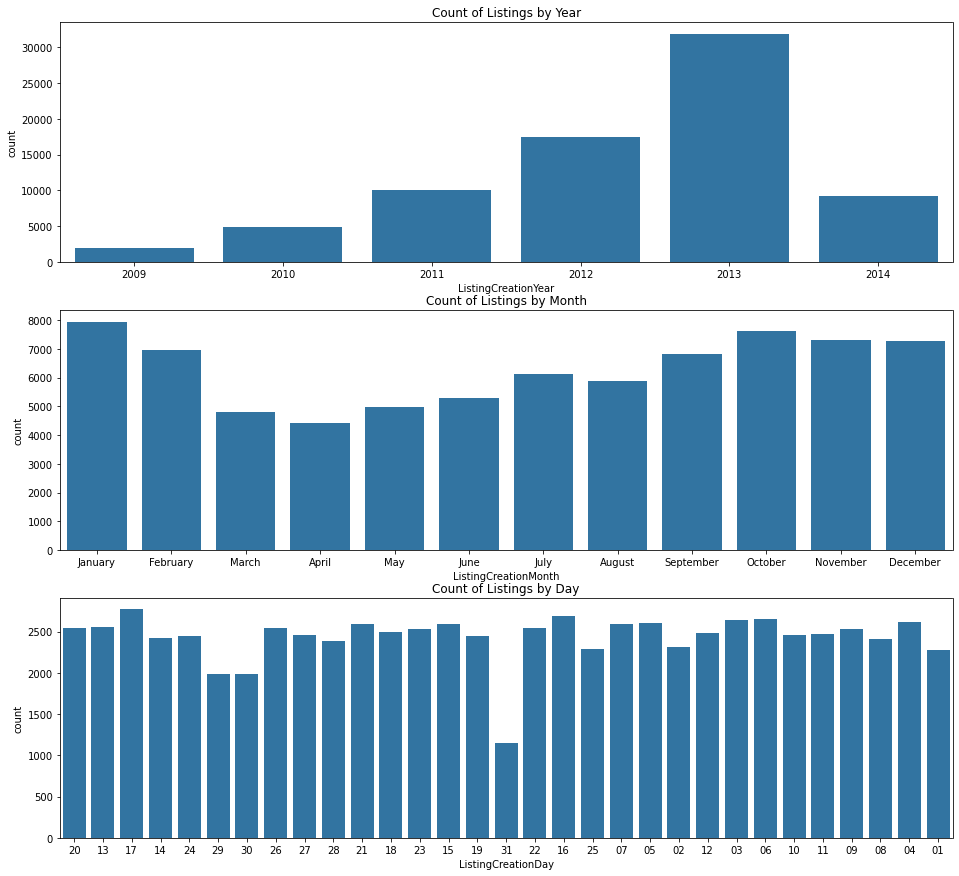

In [40]:
fig, axes = plt.subplots(3, 1, figsize=(16, 15))

# Year
sns.countplot(data = df, x = 'ListingCreationYear', color = base_color, ax = axes[0]);
axes[0].set_title('Count of Listings by Year')

# Month
sns.countplot(data = df, x = 'ListingCreationMonth', color = base_color, ax = axes[1]);
axes[1].set_title('Count of Listings by Month')

# Day of the month
sns.countplot(data = df, x = 'ListingCreationDay', color = base_color, ax = axes[2]);
axes[2].set_title('Count of Listings by Day')

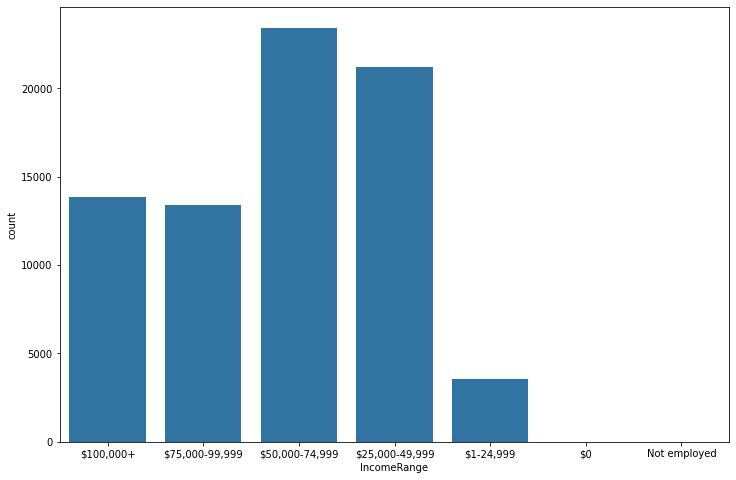

In [34]:
# Income Range
plt.figure(figsize = (12,8))
sns.countplot(data = df, x = 'IncomeRange', color = base_color);

In [32]:
df['BorrowerState'].nunique()

48

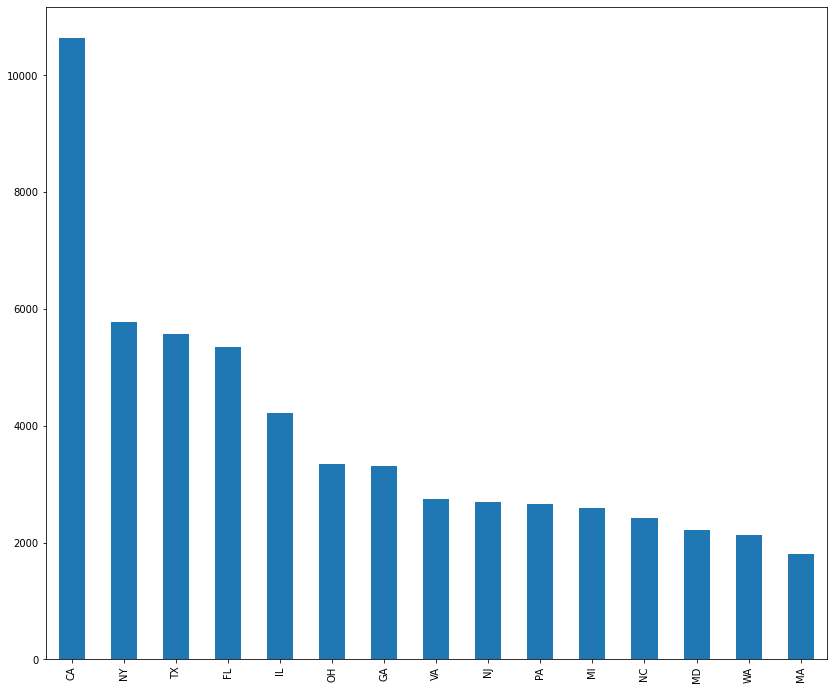

In [16]:
state_subset = df['BorrowerState'].value_counts(ascending = False)[:15]
plt.figure(figsize = (14, 12))
state_subset.plot(color= base_color, kind = 'bar');


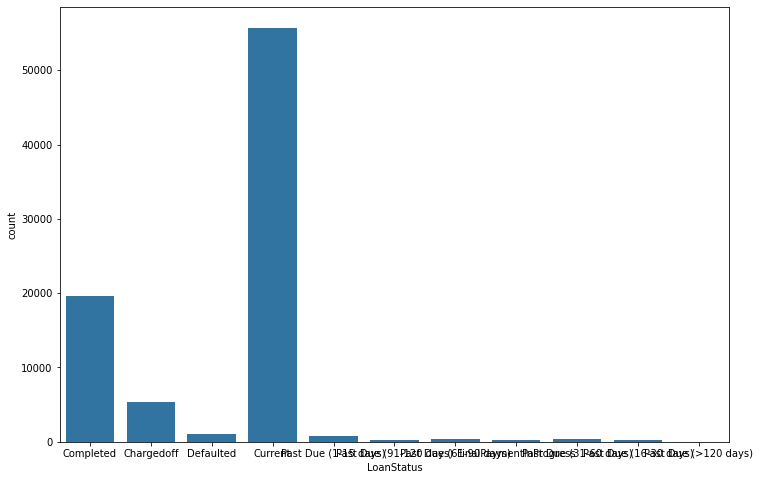

In [29]:
# loan status
plt.figure(figsize = (12,8))
sns.countplot(data = df, x = 'LoanStatus', color = base_color);

In [17]:
df.describe()

,ListingNumber,Term,ProsperScore,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,8.398200e+04,83982.000000,83982.000000,8.398200e+04,83982.000000,83982.00000,83982.000000,83982.000000,83982.000000,83982.000000,83982.000000
mean,7.712395e+05,42.462813,5.952871,5.930614e+03,9061.224381,291.40139,0.998078,0.017718,0.008133,4.360315,68.677788
std,2.359100e+05,11.639032,2.373897,8.268432e+03,6279.649648,186.47539,0.020848,0.188866,0.110285,117.610351,95.318077
min,4.162750e+05,12.000000,1.000000,0.000000e+00,1000.000000,0.00000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,5.570608e+05,36.000000,4.000000,3.426938e+03,4000.000000,157.11250,1.000000,0.000000,0.000000,0.000000,1.000000
50%,7.341785e+05,36.000000,6.000000,5.000000e+03,7500.000000,251.28000,1.000000,0.000000,0.000000,0.000000,32.000000
75%,9.756778e+05,60.000000,8.000000,7.083333e+03,13500.000000,387.62000,1.000000,0.000000,0.000000,0.000000,98.000000
max,1.255725e+06,60.000000,11.000000,1.750003e+06,35000.000000,2251.51000,1.012500,19.000000,9.000000,11000.000000,1189.000000


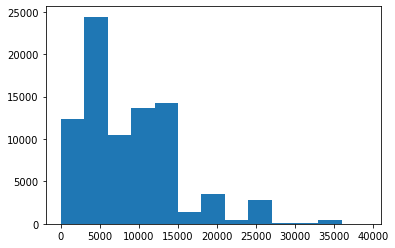

In [18]:
bins = np.arange(40, df['LoanOriginalAmount'].max()+5000, 3000);
plt.hist(df['LoanOriginalAmount'], bins = bins);

In [20]:
df['StatedMonthlyIncome'][:5]

0    6125.000000
1    2875.000000
2    9583.333333
3    8333.333333
4    2083.333333
Name: StatedMonthlyIncome, dtype: float64

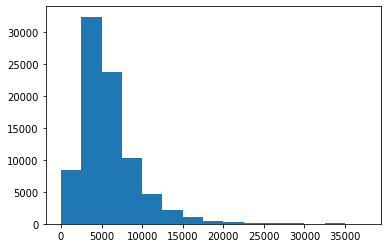

In [22]:
# stated monthly income
bins = np.arange(0,40000, 2500)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins = bins);

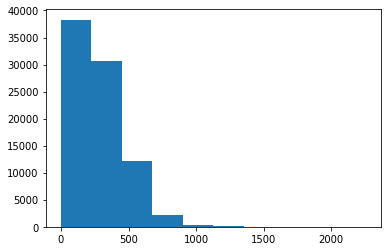

In [84]:
# monthly loan repayment
plt.hist(df['MonthlyLoanPayment']);

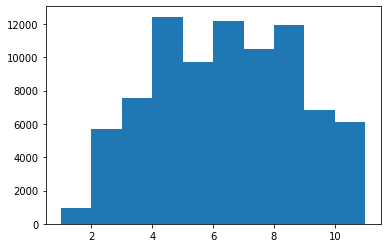

In [31]:
# bins = np.arange(20, df['ProsperScore'].max()+0.2, 0.2);
plt.hist(df['ProsperScore']);

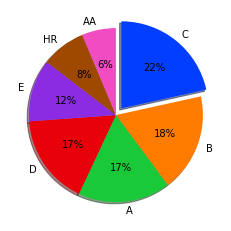

In [54]:
rating_counts = df['ProsperRating'].value_counts()
col_palette = sns.color_palette('bright')

explode = [0.1, 0, 0, 0, 0, 0, 0]
plt.pie(rating_counts, labels = rating_counts.index, startangle = 90, autopct= '%0.0f%%', colors= col_palette, 
explode = explode, shadow = True, counterclock = False);



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here! prosperscore with 11.. drop it

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83982 entries, 0 to 83981
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ListingNumber                83982 non-null  int64         
 1   ListingCreationDate          83982 non-null  datetime64[ns]
 2   Term                         83982 non-null  int64         
 3   LoanStatus                   83982 non-null  object        
 4   ProsperRating                83982 non-null  object        
 5   ProsperScore                 83982 non-null  float64       
 6   BorrowerState                83982 non-null  object        
 7   Occupation                   82708 non-null  object        
 8   EmploymentStatus             83333 non-null  category      
 9   DebtToIncomeRatio            76768 non-null  float64       
 10  IncomeRange                  83982 non-null  object        
 11  IncomeVerifiable             83982 non-nu

In [14]:
# categorical features
cat_features = ['LoanStatus', 'ProsperRating', 'BorrowerState', 'Occupation', 'EmploymentStatus',
'IncomeRange']

# numerical features
num_features = ['Term', 'ProsperScore', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 
'MonthlyLoanPayment', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors']

In [15]:
# categories
employment_categories = ['Employed', 'Full-time', 'Part-time', 'Self-employed', 
'Retired', 'Not-employed', 'Other']

employment_cat = pd.api.types.CategoricalDtype(ordered = True, categories = employment_categories)
df['EmploymentStatus'] = df['EmploymentStatus'].astype(employment_cat);

<AxesSubplot:>

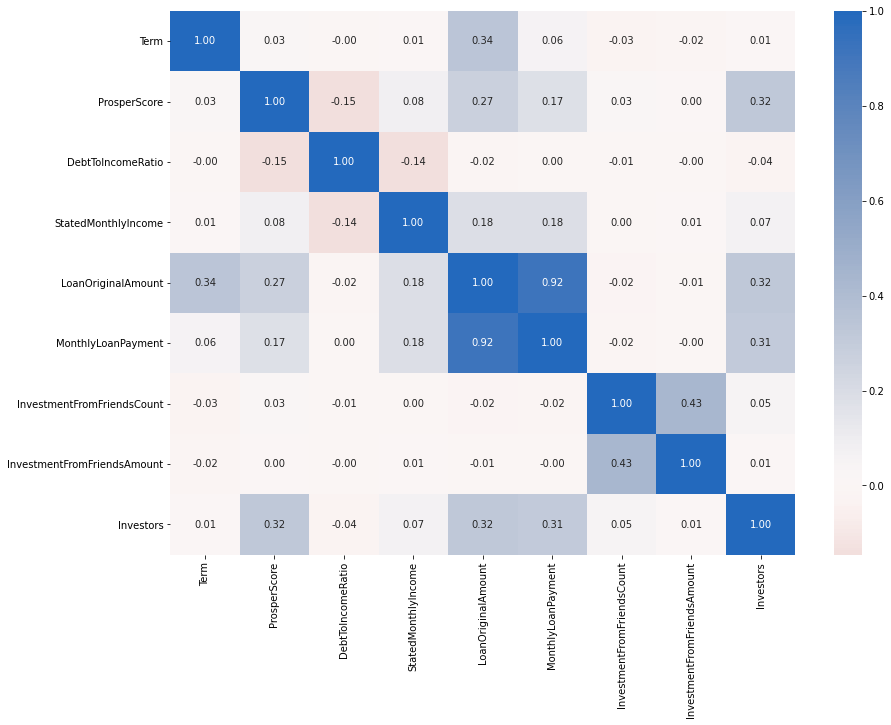

In [37]:
# correlation between the numerical variables
plt.figure(figsize = (12,10))
sns.heatmap(df[num_features].corr(), annot = True, fmt = '.2f', center = 0, cmap = 'vlag_r')


In [ ]:
g = sns.PairGrid(data = df, vars = ['DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 
'MonthlyLoanPayment', 'InvestmentFromFriendsAmount', 'Investors'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

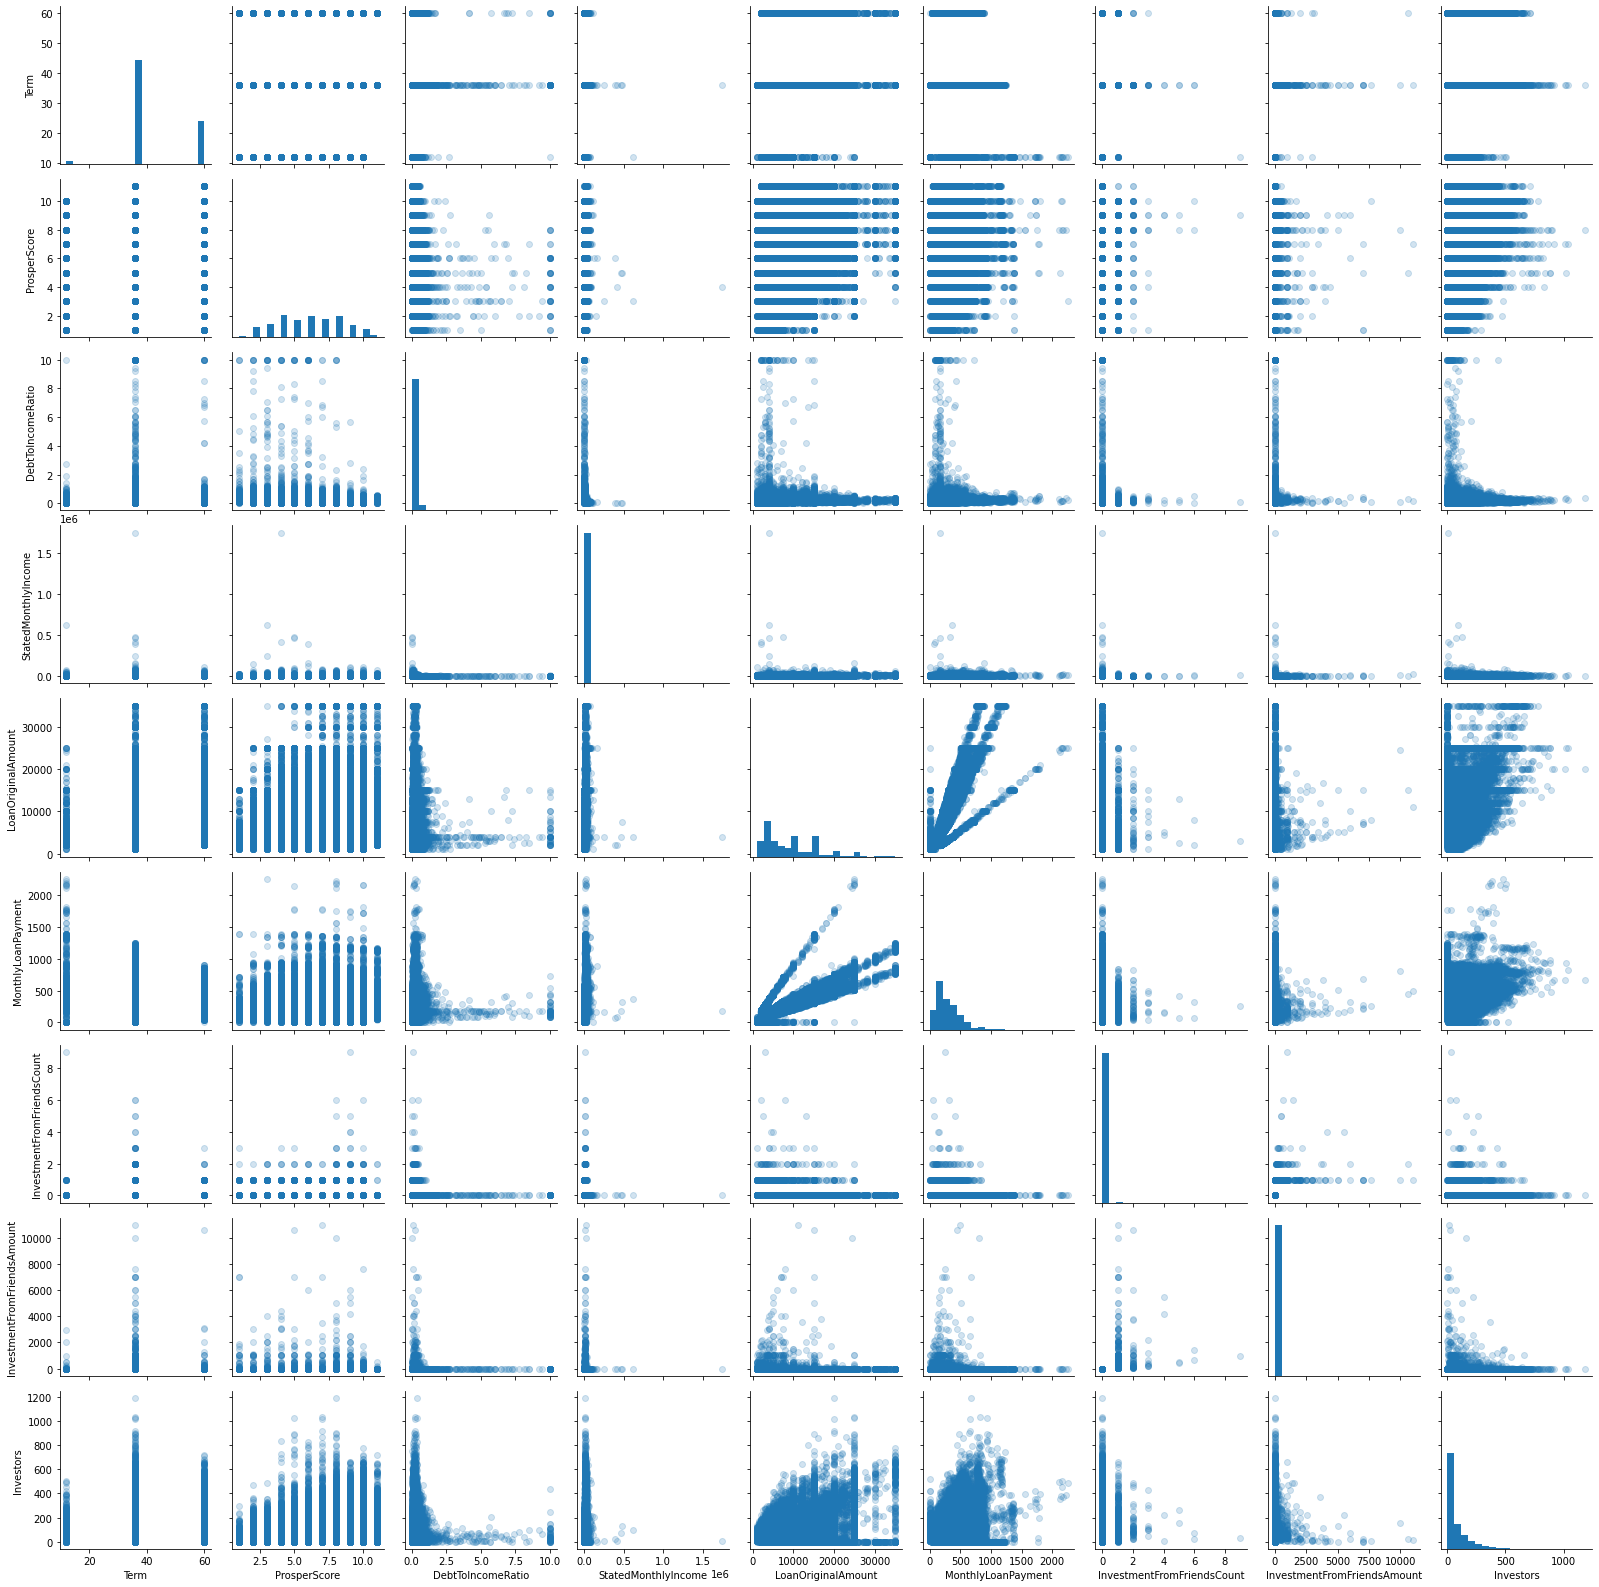

In [38]:
# loan payment vs income -- try transformation log, cuberoot..
g = sns.PairGrid(data = df, vars = num_features)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);
# sns.scatterplot(data = df, y = 'StatedMonthlyIncome', x = 'MonthlyLoanPayment')
# data_subset

<AxesSubplot:xlabel='Investors', ylabel='Recommendations'>

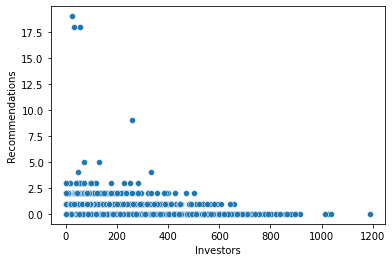

In [78]:
# recommendations vs investors
sns.scatterplot(data = df, y = 'Recommendations', x = 'Investors')

<AxesSubplot:xlabel='Term', ylabel='MonthlyLoanPayment'>

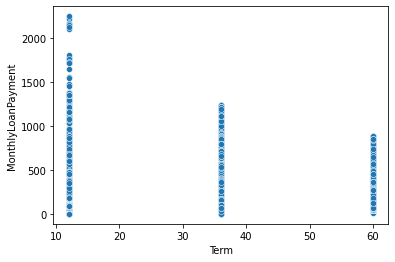

In [79]:
# repayment vs term
sns.scatterplot(data = df, x = 'Term', y = 'MonthlyLoanPayment')

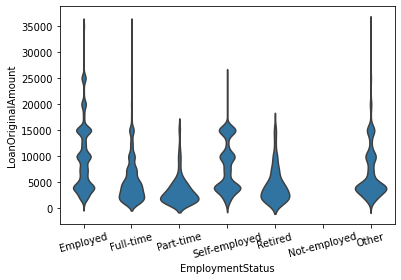

In [83]:
# loan amount vs employment status
sns.violinplot(data = df, x = 'EmploymentStatus', y = 'LoanOriginalAmount', color=base_color, inner=None)
plt.xticks(rotation=15);

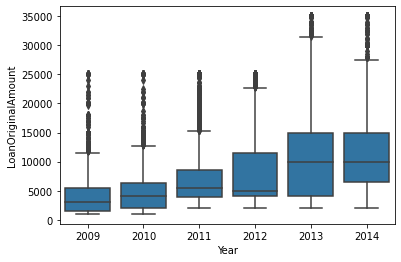

In [21]:
# loan original amount vs loan year
sns.boxplot(data = df, x = 'Year', y = 'LoanOriginalAmount', color = base_color);

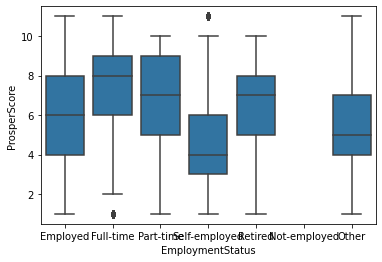

In [89]:
# employment status vs prosper score
sns.boxplot(data = df, x = 'EmploymentStatus', y = 'ProsperScore', color = base_color);

<AxesSubplot:xlabel='LoanStatus', ylabel='LoanOriginalAmount'>

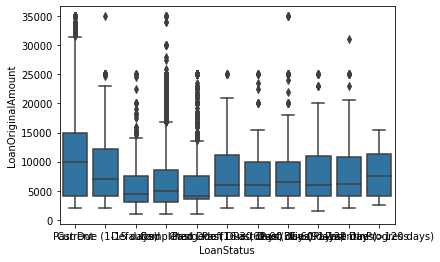

In [92]:
# original amount vs loan status
sns.boxplot(data = df, x = 'LoanStatus', y = 'LoanOriginalAmount', color=base_color)

In [18]:
df.columns

Index(['ListingNumber', 'Year', 'Month', 'ListingCreationDate', 'Term',
       'LoanStatus', 'ProsperRating', 'ProsperScore', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'DebtToIncomeRatio', 'IncomeRange',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanOriginalAmount',
       'LoanOriginationDate', 'LoanOriginationQuarter', 'MonthlyLoanPayment',
       'PercentFunded', 'Recommendations', 'InvestmentFromFriendsCount',
       'InvestmentFromFriendsAmount', 'Investors'],
      dtype='object')

<AxesSubplot:xlabel='Year', ylabel='LoanOriginalAmount'>

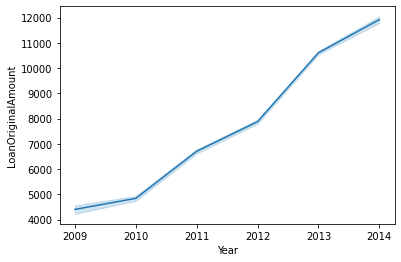

In [16]:
# trend (month, loanamount)
sns.lineplot(data = df, x = 'Year', y = 'LoanOriginalAmount')

<AxesSubplot:xlabel='Month', ylabel='LoanOriginalAmount'>

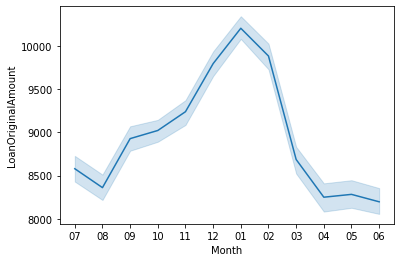

In [17]:
sns.lineplot(data = df, x = 'Month', y = 'LoanOriginalAmount')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

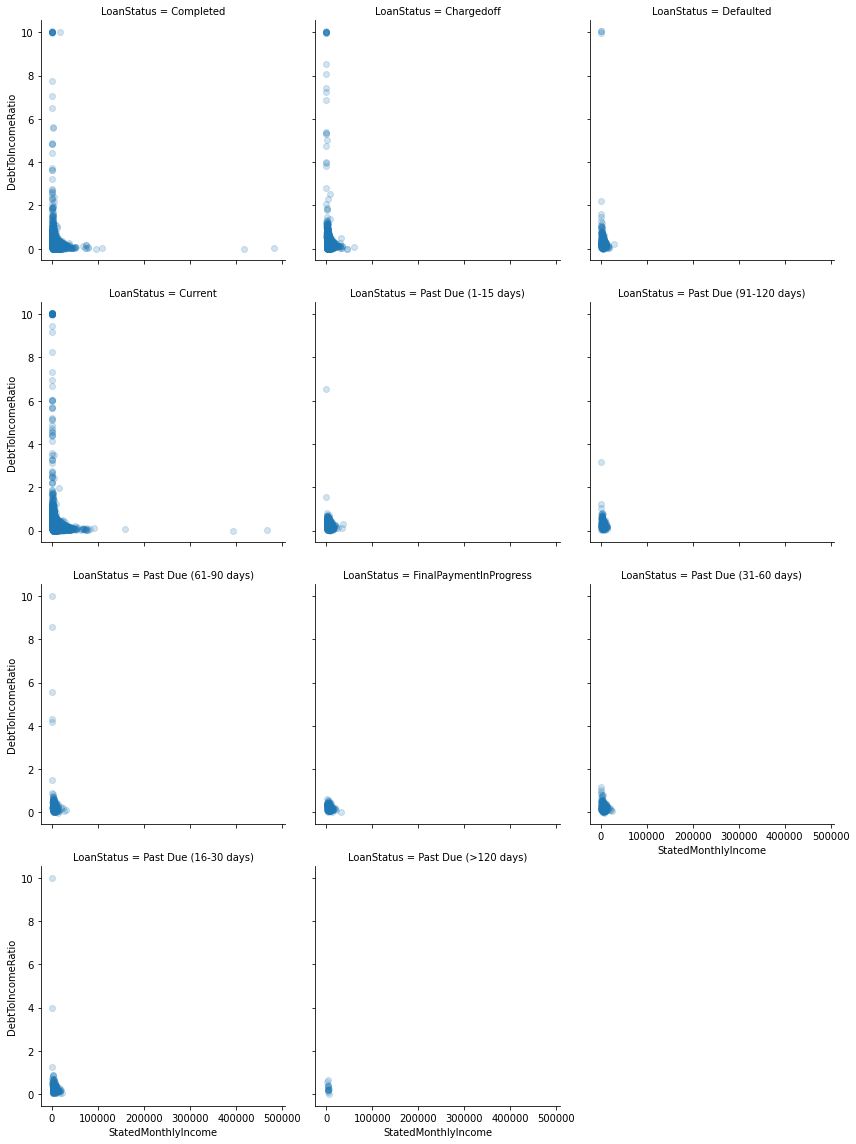

In [28]:
# g = sns.FacetGrid(data = df, hue = 'Occupation', height = 5)
# g.map(plt.scatter, 'StatedMonthlyIncome', 'DebtToIncomeRatio')

# use another viz type
g = sns.FacetGrid(data = df, col = 'LoanStatus', height = 4,
                     col_wrap = 3)
g.map(sns.regplot, 'StatedMonthlyIncome', 'DebtToIncomeRatio', y_jitter = 0.04, fit_reg = False,
        scatter_kws = {'alpha' : 1/5})

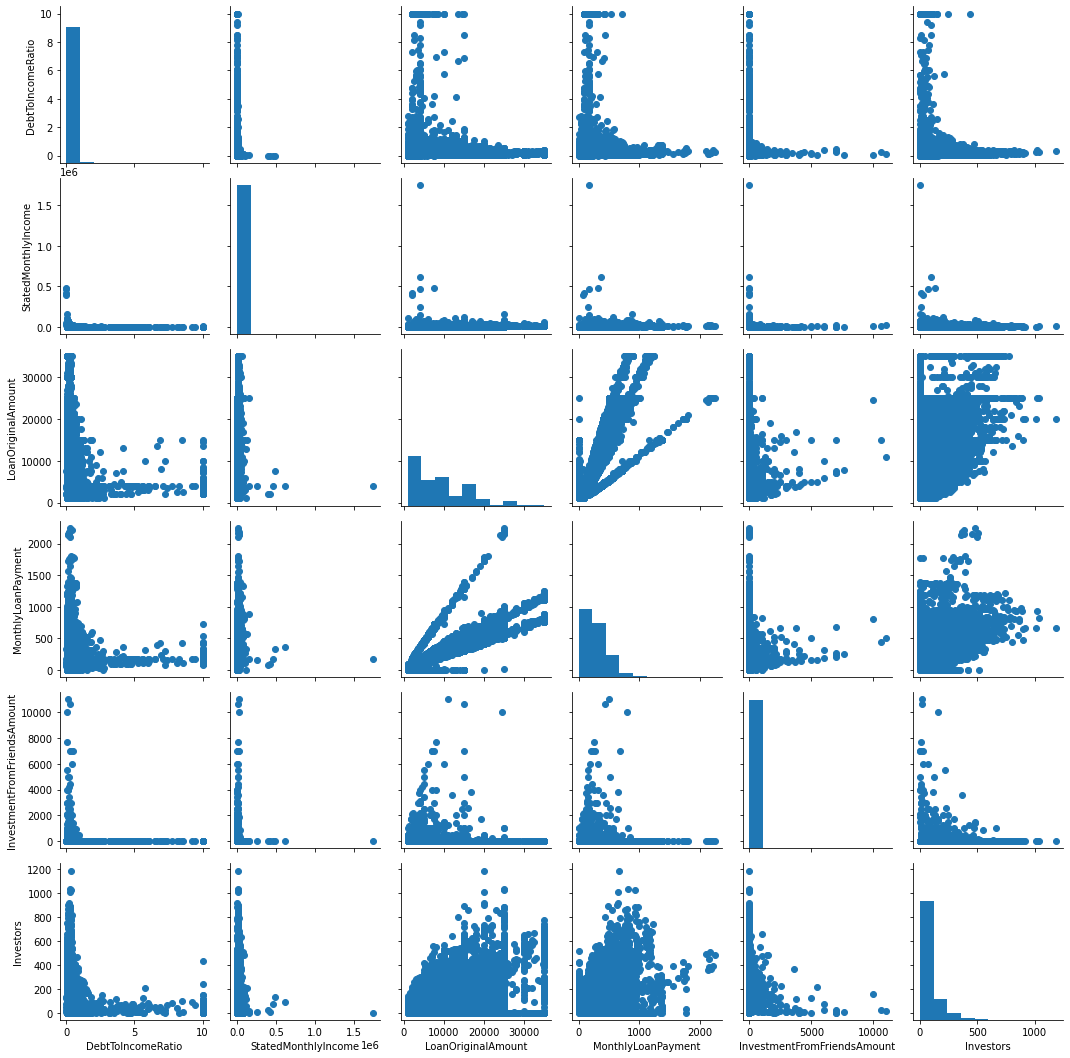

In [34]:
# plot matrix between the numeric variables
g = sns.PairGrid(data = df, vars = ['DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 
'MonthlyLoanPayment', 'InvestmentFromFriendsAmount', 'Investors'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

/home/carol/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


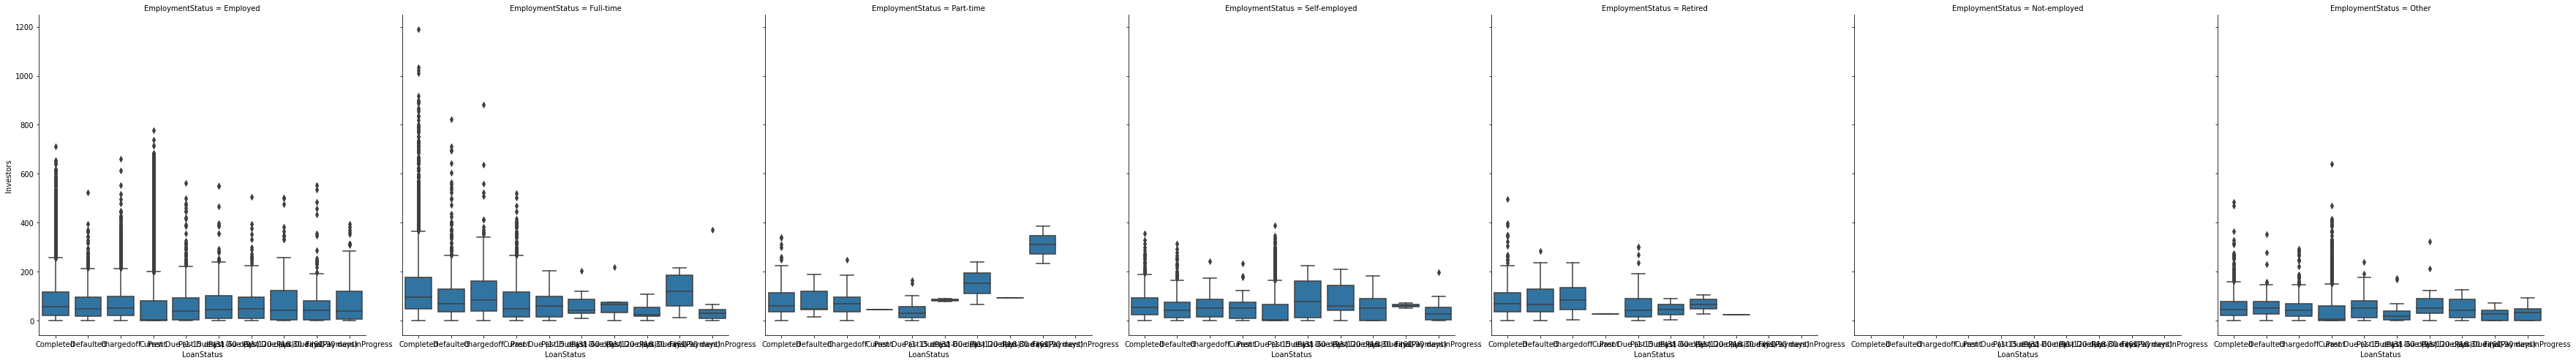

In [31]:
# loan status, emp status, investors
g = sns.FacetGrid(data = df, col = 'EmploymentStatus', height = 7);
g.map(sns.boxplot, 'LoanStatus', 'Investors');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

